In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
plt.style.use('seaborn')

In [14]:
df = pd.DataFrame({'Peso': np.array([18.141,42.404,16.1,13.005,23.583,7.710,17.46,3.855,14.966,4.308,9.524,35.828]),
                    'Altura': np.array([1.087,1.613,0.953,1.003,1.156,0.978,1.092,0.572,0.940,0.597,0.838,1.473]),
                    'Cateter': np.array([37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47])})
x1 = np.array(df[["Altura"]])
y1 = np.array(df[["Cateter"]])

REGRESSÃO LINEAR SIMPLES - SCIKITLEARN IMPLEMENTATION

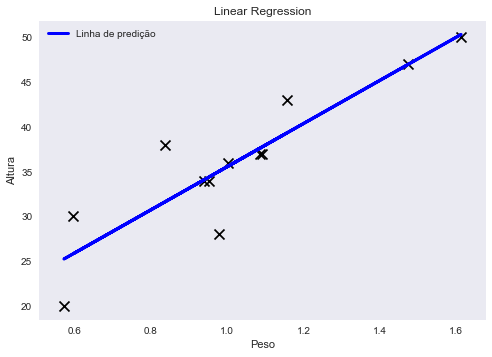

EQUATION: Theta(x) = [[24.08702511]]x + [11.47345142] , R² = 0.7968581624505837


In [3]:
def graf():
    # plt.show()
    print(f"EQUATION: Theta(x) = {a}x + {b} , R² = {R2}")

X = np.array(df[["Altura"]])
y = np.array(df[["Cateter"]])
reg = linear_model.LinearRegression()
reg.fit(X, y)
R2 = reg.score(X, y)
a = reg.coef_
b = reg.intercept_
y_pred = reg.predict(X)

plt.scatter(X, y, color='black', marker ="x", s = 100)
plt.plot(X,y_pred, color='blue', linewidth=3, label ="Linha de predição")
plt.legend()
plt.title("Linear Regression")
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.grid()
plt.show()

graf()

IMPLEMENTAÇÕES


GRADIENTE DESCENDENTE


In [5]:
x = np.array([1 ,2 ,3, 4, 5])
y = np.array([2, 4, 6, 8,10])


Theta(x) = [6.2568]x + [5.78666667], custo ([1369.33333333]),  [0]
Theta(x) = [10.42803013]x + [9.62118462], custo ([613.57903817]),  [1]
Theta(x) = [13.2126901]x + [12.15798672], custo ([279.54429143]),  [2]
Theta(x) = [15.07547815]x + [13.832142], custo ([131.89474129]),  [3]
Theta(x) = [16.32532795]x + [14.93288552], custo ([66.62101603]),  [4]
Theta(x) = [17.16762031]x + [15.65250138], custo ([37.75468941]),  [5]
Theta(x) = [17.73889366]x + [16.11882029], custo ([24.97935775]),  [6]
Theta(x) = [18.12991975]x + [16.41682411], custo ([19.31589417]),  [7]
Theta(x) = [18.40104447]x + [16.60300862], custo ([16.79584281]),  [8]
Theta(x) = [18.59238647]x + [16.71493192], custo ([15.66528522]),  [9]
Theta(x) = [18.73061724]x + [16.7775623], custo ([15.14904938]),  [10]
Theta(x) = [18.83346855]x + [16.80749829], custo ([14.90453421]),  [11]
Theta(x) = [18.91272901]x + [16.81577416], custo ([14.78031956]),  [12]
Theta(x) = [18.97623618]x + [16.80972506], custo ([14.70948045]),  [13]
Theta(x)

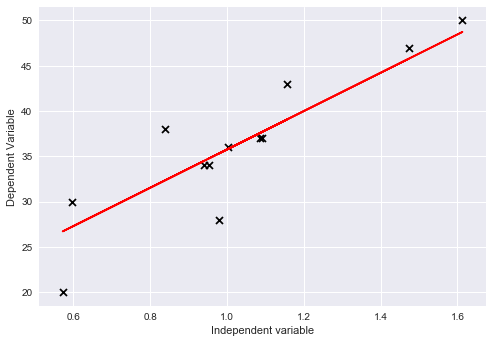

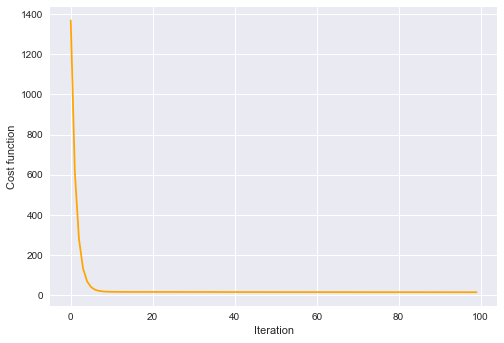

In [20]:
def gradiente_descendente(x, y, Custo = None):
    wo = w = 0
    inter = 100
    alpha = 0.08 #learning rate
    n = len(x)
    custo = custot = np.array([])

    for t in range(inter):
        y_pred = x*w + wo
        custot = ((1/n) * sum([val**2 for val in (y-y_pred)]))
        custo = np.append(custo, custot) 
        derivada_w = -(2/n)*sum(x*(y-y_pred))
        derivada_wo = -(2/n)*sum(y-y_pred)
        w = w - alpha*derivada_w
        wo = wo - alpha*derivada_wo
        print(f"Theta(x) = {w}x + {wo}, custo ({custot}),  [{t}]")
    
    plt.scatter(x, y, marker = "x", color = "black")
    plt.plot(x,y_pred, color = "red")
    plt.xlabel("Independent variable")
    plt.ylabel("Dependent Variable")
    plt.show()
    if Custo:
      plt.plot(np.array([t for t in range(0, inter)]), custo, color = "orange")
      plt.xlabel("Iteration")
      plt.ylabel("Cost function")
      plt.show()
   

gradiente_descendente(x1,y1, Custo = True)

GRADIENTE DESCENDENTE ESTOCASTICO

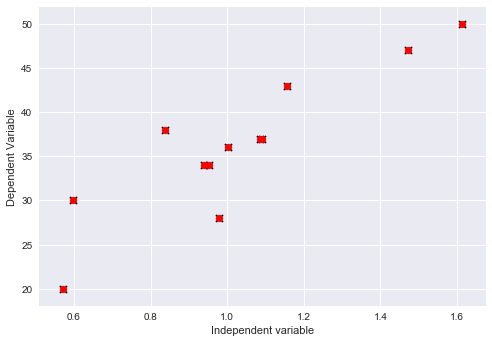

Theta(x) = [21.84129937]x + [14.82776603]


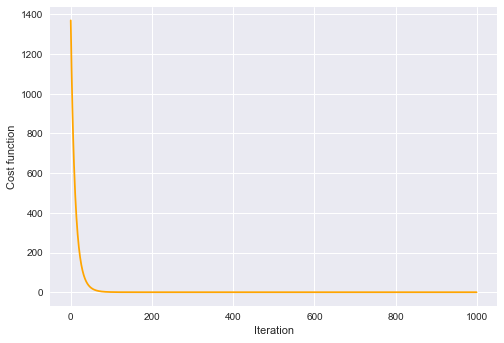

In [21]:
def gradiente_descendente_estocastico(x, y, Custo = None):
    wo = w = 0
    inter = 1000
    alpha = 0.02  #learning rate
    n = len(x)
    custo = custot = np.array([])
    for t in range(inter):
        y_pred = x*w + wo
        custot = ((1/n) * sum([val**2 for val in (y-y_pred)]))
        custo = np.append(custo, custot) 
        wo = wo + alpha*(y- y_pred)
        w = w + alpha*(y - y_pred)*x
  
    plt.scatter(x, y, marker = "x", color = "black")
    plt.scatter(x,y_pred, color = "red")
    plt.xlabel("Independent variable")
    plt.ylabel("Dependent Variable")
    plt.show()
    print(f"Theta(x) = {w[-1]}x + {wo[-1]}")

    if Custo:
      plt.plot(np.array([t for t in range(0, inter)]), custo, color = "orange")
      plt.xlabel("Iteration")
      plt.ylabel("Cost function")
      plt.show()

gradiente_descendente_estocastico(x1,y1, Custo =True)

REGRESSÃO LINEAR ANALÍTICA


In [8]:
x = np.array([[1 ,2 ,3, 4]])
y = np.array([[2, 4, 6, 8]])

df = pd.DataFrame({'Peso': np.array([18.141,42.404,16.1,13.005,23.583,7.710,17.46,3.855,14.966,4.308,9.524,35.828]),
                    'Altura': np.array([1.087,1.613,0.953,1.003,1.156,0.978,1.092,0.572,0.940,0.597,0.838,1.473]),
                    'Cateter': np.array([37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47])})


In [10]:
X = np.ones(24).reshape(12,2)
X[:,1] = df["Altura"]
X = np.matrix(X)
y = np.matrix(df["Cateter"]).reshape((12,1))
w = np.linalg.inv((X.T*X))*X.T*y
print(f"Theta(x) = {w[1]}x + {w[0]}")

Theta(x) = [[24.08702511]]x + [[11.47345142]]
